In [4]:
library(parallel)
library(lme4)
library(mgcv)
library(xtable)
get_or <- function(fit) { c(exp(c(coef(fit)[2,1],coef(fit)[2,1]-1.96*coef(fit)[2,2],coef(fit)[2,1]+1.96*coef(fit)[2,2])),coef(fit)[2,4]) }

Data requirements: patient mutation matrix, patient affinitiy matrix

In [7]:
#Format data
tissue <- read.csv('../../data/patient_tissues.csv',header=TRUE)
mut <- read.csv('../../data/patient_mutations.cancer.PHBR.csv',header=TRUE)
aff <- read.csv('../../data/patient_affinities.cancer.PHBR.csv',header=TRUE)
patient <- as.character(mut[,1])
mut <- as.matrix(mut[,-1])
aff <- as.matrix(aff[,-1])
rownames(mut) <- rownames(aff) <- patient

In [9]:
y= as.vector(mut); x= as.vector(aff)

## Linear relationship with real values (revision)

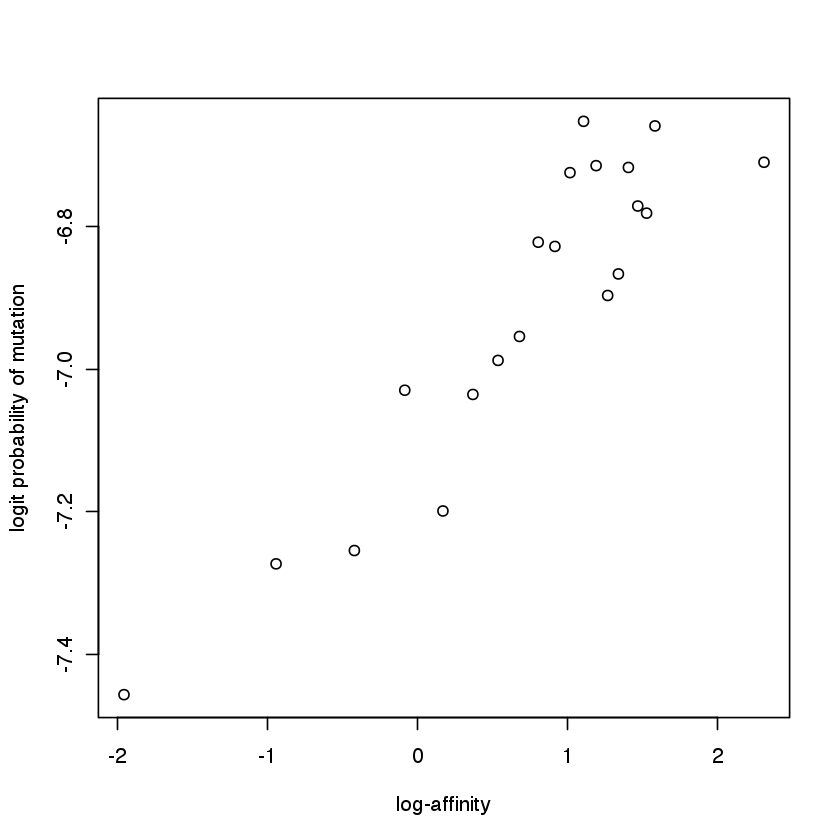

In [10]:
thre <- c(0,0.5,1,1.5,2,2.5,3,4,5,Inf)
xr= cut(x,breaks=thre)
m <- tapply(y,xr,'mean')
thre <- c(seq(0,5,length=20),Inf)
xr= cut(x,breaks=thre)
m <- tapply(y,xr,'mean')
plot(log(tapply(x,xr,'mean')),log(m/(1-m)),xlab='log-affinity',ylab='logit probability of mutation')

## Panels A and B

In [17]:
gene= rep(colnames(mut),each=nrow(mut))
pat= rep(rownames(mut),ncol(mut))
nmut= colSums(mut)
sel= gene %in% names(nmut[nmut>=5])

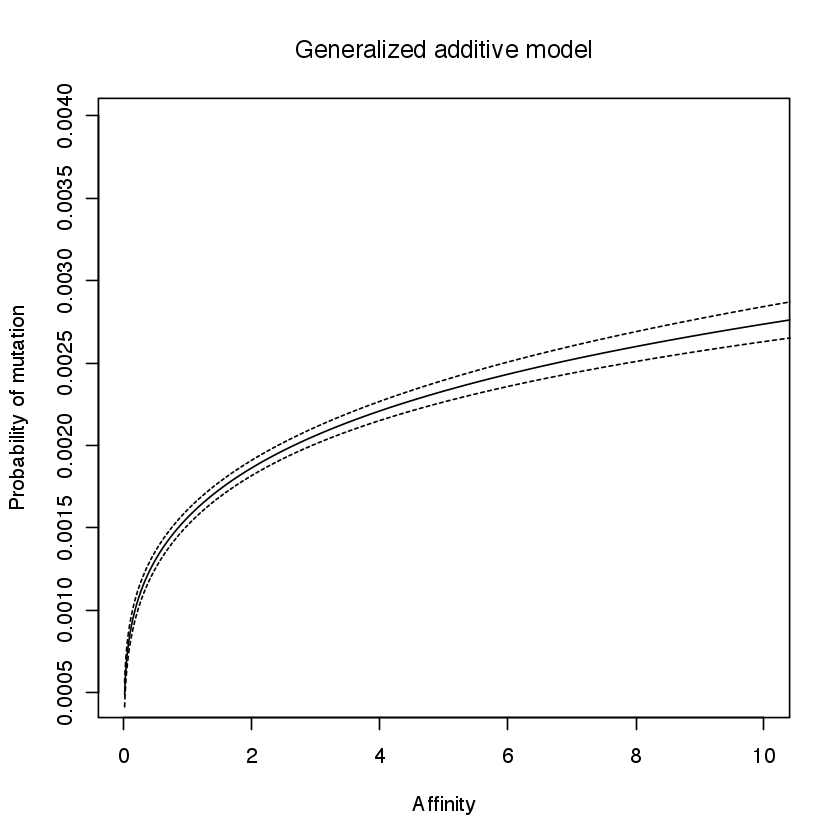

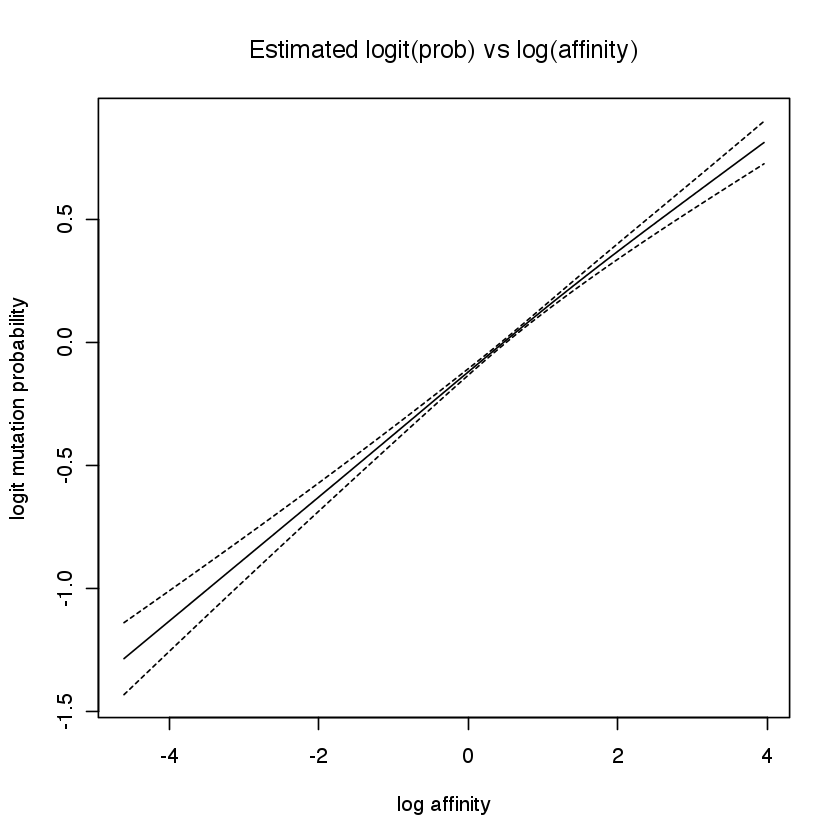

In [18]:
gam1= gam(y[sel] ~ s(log(x[sel])), family='binomial')
ypred= predict(gam1,type='response',se.fit=TRUE)
o= order(x[sel])
plot(x[sel][o],ypred$fit[o],type='l',xlim=c(0,10),xlab='Affinity',ylab='Probability of mutation',main='Generalized additive model')
lines(x[sel][o],ypred$fit[o]-1.96*ypred$se.fit[o],lty=2)
lines(x[sel][o],ypred$fit[o]+1.96*ypred$se.fit[o],lty=2)
#
plot(gam1,rug=FALSE,xlab='log affinity',ylab='logit mutation probability',main='Estimated logit(prob) vs log(affinity)')